In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns
import re
import matplotlib.gridspec as gridspec

%matplotlib notebook

C:\Users\sunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\sunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'Country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


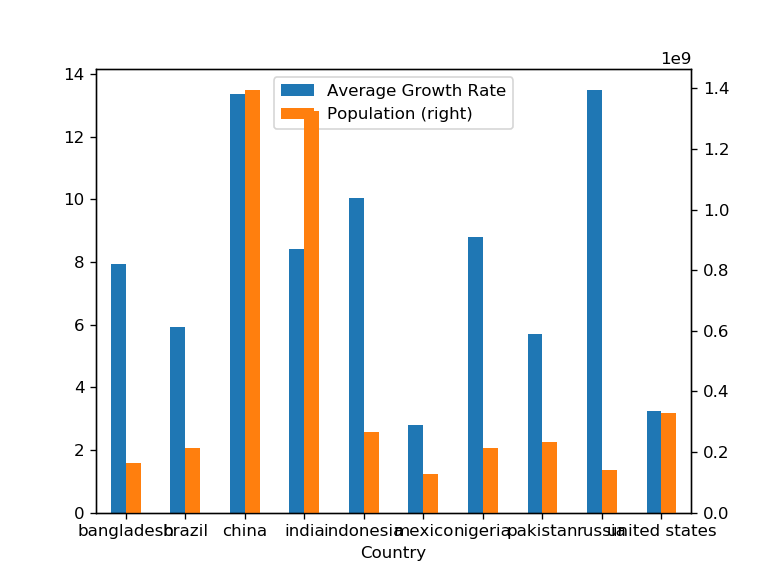

In [119]:
# read in data
data = pd.read_csv('gdp_data.csv')

# look at every year since 2000
since2k = data[data['Year'] >= 2000].sort_values(by='Year', ascending=True)

# Average the annual growth rates for the last 20 years for each country
out = since2k.groupby('Country')['Annual Growth Rate'].agg({'Average Growth Rate': np.average})
out['Country'] = out.index.tolist()
out = out.sort_values(by='Country', ascending=True)
out['Population'] = since2k[since2k['Year'] == 2019].sort_values(by='Country', ascending=True)['Population'].tolist()

# Display Bar Chart
# plt.figure(figsize=(10,8))
# plt.bar(out['Country'].tolist(), out['Average Growth Rate'].tolist(), color='tab:red')
# plt.gca().set_title('Average GDP Growth Rate for the Top 10 most populated countries (since 2000)')
# plt.gca().set_ylabel('Growth Rate(%)')
# plt.gca().set_xlabel('Country')

# _ = out.plot( kind= 'bar' , secondary_y= 'Population', rot= 0 )
# plt.show()

<IPython.core.display.Javascript object>


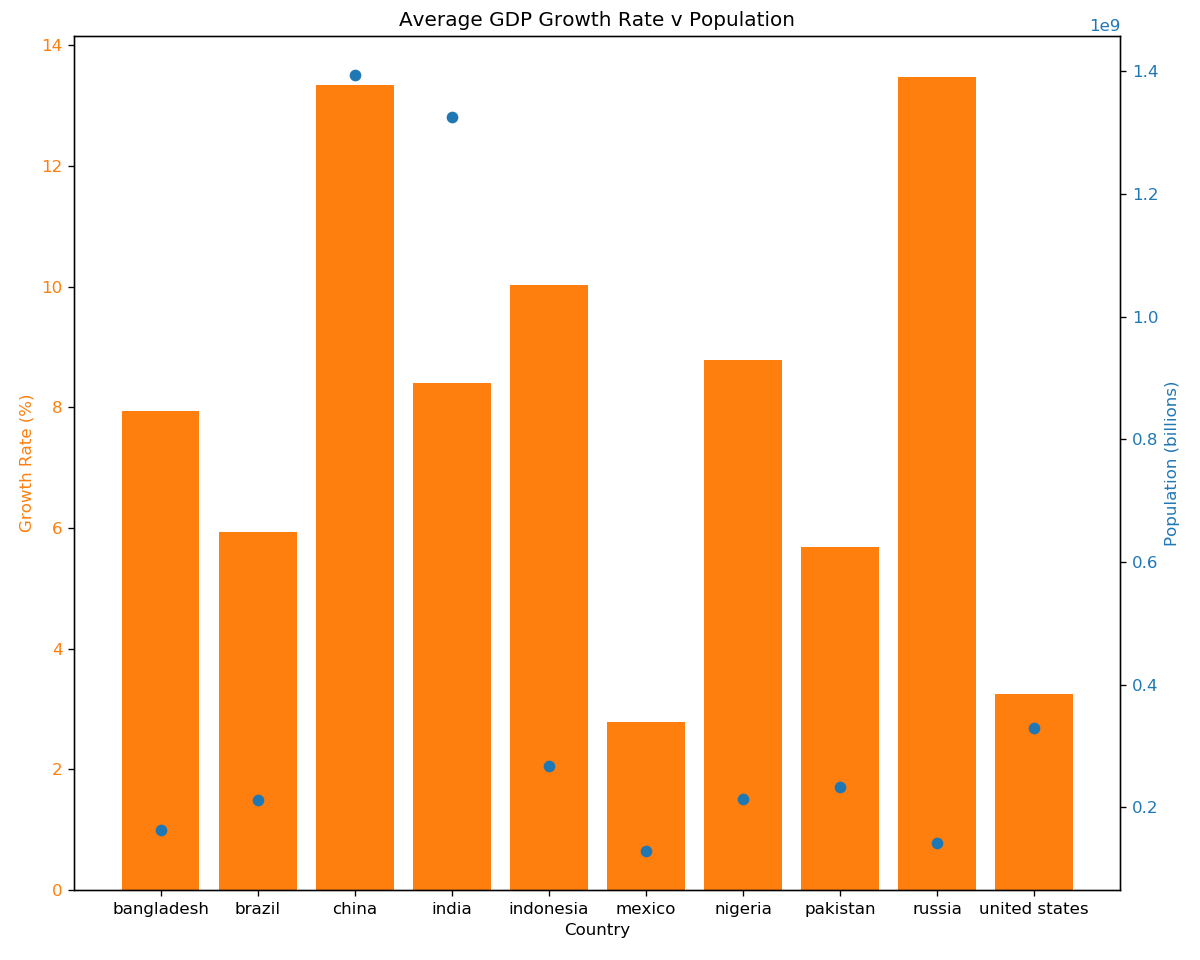

In [140]:
fig, ax1 = plt.subplots(figsize=(10,8))

color = 'tab:orange'
ax1.set_xlabel('Country')
ax1.set_ylabel('Growth Rate (%)', color=color)
ax1.bar(out['Country'].tolist(), out['Average Growth Rate'].tolist(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Population (billions)', color=color)  # we already handled the x-label with ax1
ax2.scatter(out['Country'].tolist(), out['Population'].tolist(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.gca().set_title('Average GDP Growth Rate v Population')
plt.show()